# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NYC Queens - Data Processing

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
from pandas import DataFrame

## 1. Data Cleaning

In [2]:
queens = pd.read_csv('queens_addr2.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Drop attributes
- cmplnt_num
- cmplnt_fr_dt
- cmplnt_fr_tm
- crm_atpt_cptd_cd
- boro_nm
- parks_nm
- Number
- City
- State
- Country

In [3]:
attributes_to_drop = ['cmplnt_num', 'cmplnt_fr_dt', 'crm_atpt_cptd_cd', 'cmplnt_fr_tm', 'boro_nm', 
                      'parks_nm','Number', 'City', 'State', 'Country']
df = queens.drop(attributes_to_drop, axis = 1)
df = df.dropna(subset=['Zip'])

In [4]:
print(df.groupby('Zip').count().index[0:50])

Index([10001.0, 10003.0, 10010.0, 10011.0, 10013.0, 10014.0, 10018.0, 10022.0,
       10025.0, 10029.0, 10031.0, 10034.0, 10035.0, 10065.0, 10128.0, 10306.0,
       10307.0, 10314.0, 10458.0, 10465.0, 10472.0, 10473.0, 11001.0, 11004.0,
       11005.0, 11020.0, 11021.0, 11040.0, 11096.0, 11101.0, 11102.0, 11103.0,
       11104.0, 11105.0, 11106.0, 11109.0, 11201.0, 11203.0, 11205.0, 11206.0,
       11207.0, 11208.0, 11211.0, 11212.0, 11213.0, 11219.0, 11220.0, 11221.0,
       11223.0, 11225.0],
      dtype='object', name='Zip')


In [5]:
print(df.groupby('Zip').count().index[50:100])

Index([11230.0, 11232.0, 11237.0, 11354.0, 11355.0, 11356.0, 11357.0, 11358.0,
       11359.0, 11360.0, 11361.0, 11362.0, 11363.0, 11364.0, 11365.0, 11366.0,
       11367.0, 11368.0, 11369.0, 11370.0, 11372.0, 11373.0, 11374.0, 11375.0,
       11377.0, 11378.0, 11379.0, 11385.0, 11411.0, 11412.0, 11413.0, 11414.0,
       11415.0, 11416.0, 11417.0, 11418.0, 11419.0, 11420.0, 11421.0, 11422.0,
       11423.0, 11425.0, 11426.0, 11427.0, 11428.0, 11429.0, 11430.0, 11432.0,
       11433.0, 11434.0],
      dtype='object', name='Zip')


In [6]:
print(df.groupby('Zip').count().index[100:])

Index([     11435.0,      11436.0,      11451.0,      11559.0,      11580.0,
            11691.0,      11692.0,      11693.0,      11694.0,      11697.0,
            '10010',      '10014',      '10035',      '11001',      '11004',
            '11005',      '11021',      '11040',      '11096',      '11101',
            '11102',      '11103',      '11104',      '11105',      '11106',
            '11109',      '11207',      '11208',      '11234',      '11237',
            '11354',      '11355',      '11356',      '11357',      '11358',
            '11360',      '11361',      '11362',      '11363',      '11364',
            '11365',      '11366',      '11367',      '11368',      '11369',
            '11370',      '11372',      '11373',      '11374', '11374-2756',
            '11375',      '11377',      '11378',      '11379',      '11385',
            '11411',      '11412',      '11413',      '11414',      '11415',
            '11416',      '11417',      '11418',      '11419',      '11420',

In [7]:
# Replace zip code with extension
# 11374-2756 -> 11374
df['Zip'].replace('11374-2756', '11374', inplace=True)

In [8]:
# Treat mixed data type in "Zip" column
df = df.astype({"Zip": int})
df = df.astype({"Zip": str})

In [9]:
# Queens zip 11004~11697
index_to_remove = [x for x in df.groupby('Zip').count().index if (x < '11004') or (x > '11697') ]

# Slice dataframe
for zipcode in index_to_remove:
    df = df[df["Zip"] != zipcode]

In [10]:
len(df['Zip'].unique())

88

In [11]:
index_to_remove = list(df['Zip'].value_counts()[57:].index)
print(index_to_remove)

['11363', '11040', '11237', '11697', '11109', '11208', '11096', '11005', '11425', '11580', '11430', '11451', '11021', '11212', '11225', '11020', '11223', '11206', '11234', '11201', '11559', '11221', '11213', '11232', '11219', '11220', '11230', '11205', '11359', '11211', '11203']


In [12]:
# Slice dataframe
for desc in index_to_remove:
    df = df[df["Zip"] != desc]
len(df['Zip'].unique())

57

In [13]:
queens_zip = list(df['Zip'].unique())
queens_zip.sort()
print(queens_zip)

['11004', '11101', '11102', '11103', '11104', '11105', '11106', '11207', '11354', '11355', '11356', '11357', '11358', '11360', '11361', '11362', '11364', '11365', '11366', '11367', '11368', '11369', '11370', '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411', '11412', '11413', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11422', '11423', '11426', '11427', '11428', '11429', '11432', '11433', '11434', '11435', '11436', '11691', '11692', '11693', '11694']


## Law category
- "Felony" means an offense for which a sentence to a term of imprisonment in excess of one year may be imposed.
- "Misdemeanor" means an offense, other than a "traffic infraction, " for which a sentence to a term of imprisonment in excess of fifteen days may be imposed, but for which a sentence to a term of imprisonment in excess of one year cannot be imposed.
- "Violation" means an offense, other than a "traffic infraction", for which a sentence to a term of imprisonment in excess of fifteen days cannot be imposed.

In [14]:
df['law_cat_cd'].unique()

array(['MISDEMEANOR', 'FELONY', 'VIOLATION'], dtype=object)

## Offense description

### Rows to remove: ofns description total count < 1000

In [15]:
df['ofns_desc'].value_counts()[0:29]

PETIT LARCENY                     79328
HARRASSMENT 2                     71199
CRIMINAL MISCHIEF & RELATED OF    51232
ASSAULT 3 & RELATED OFFENSES      51162
GRAND LARCENY                     38047
FELONY ASSAULT                    19695
OFF. AGNST PUB ORD SENSBLTY &     18098
MISCELLANEOUS PENAL LAW           17228
BURGLARY                          14056
ROBBERY                           13054
GRAND LARCENY OF MOTOR VEHICLE     8899
VEHICLE AND TRAFFIC LAWS           8768
DANGEROUS WEAPONS                  6634
SEX CRIMES                         6365
DANGEROUS DRUGS                    6233
OFFENSES AGAINST PUBLIC ADMINI     5285
INTOXICATED & IMPAIRED DRIVING     5264
FORGERY                            3822
THEFT-FRAUD                        3723
CRIMINAL TRESPASS                  3532
UNAUTHORIZED USE OF A VEHICLE      2942
FRAUDS                             2195
POSSESSION OF STOLEN PROPERTY      1506
RAPE                               1489
OTHER OFFENSES RELATED TO THEF     1229


In [16]:
index_to_remove = list(df['ofns_desc'].value_counts()[26:].index)
print(index_to_remove)

['OFFENSES AGAINST THE PERSON', 'ARSON', 'OFFENSES INVOLVING FRAUD', 'NYS LAWS-UNCLASSIFIED FELONY', "BURGLAR'S TOOLS", 'OTHER STATE LAWS (NON PENAL LA', 'KIDNAPPING & RELATED OFFENSES', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'OFFENSES RELATED TO CHILDREN', 'PETIT LARCENY OF MOTOR VEHICLE', 'THEFT OF SERVICES', 'FRAUDULENT ACCOSTING', 'PROSTITUTION & RELATED OFFENSES', 'OFFENSES AGAINST PUBLIC SAFETY', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'GAMBLING', 'ENDAN WELFARE INCOMP', 'JOSTLING', 'DISORDERLY CONDUCT', 'OTHER STATE LAWS', 'KIDNAPPING', 'CHILD ABANDONMENT/NON SUPPORT', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'ANTICIPATORY OFFENSES', 'ESCAPE 3', 'UNLAWFUL POSS. WEAP. ON SCHOOL', 'FELONY SEX CRIMES', 'DISRUPTION OF A RELIGIOUS SERV', 'NEW YORK CITY HEALTH CODE', 'INTOXICATED/IMPAIRED DRIVING', 'LOITERING/GAMBLING (CARDS, DIC', 'ADMINISTRATIVE CODES', 'OTHER TRAFFIC INFRACTION', 'OTHER STATE LAWS (NON PENAL LAW)', 'ABORTION']


In [17]:
# Slice dataframe
for desc in index_to_remove:
    df = df[df["ofns_desc"] != desc]
len(df["ofns_desc"].value_counts())

26

In [18]:
df.shape

(442146, 21)

## Queens data (queens_df.csv)
- Zip code cleaning
- Offense description cleaning

In [19]:
# Write to a csv file
df.to_csv("df_queens.csv", index = False)

## 2. EDA

## Crime distribution by zip code

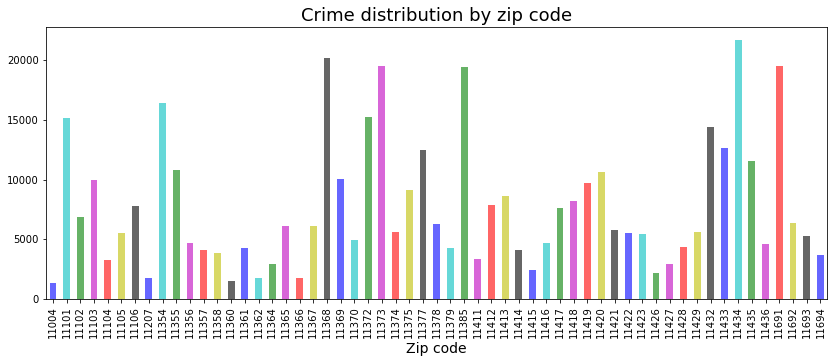

In [20]:
# Zip-code
fig = plt.figure(figsize = (14,5))
_ = df['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Crime distribution by zip code", fontsize=18)
_ = plt.xlabel('Zip code', fontsize = 14)

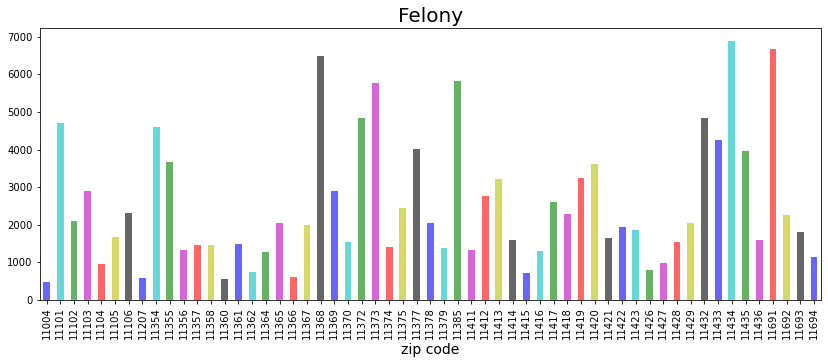

In [21]:
# Felony by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='FELONY']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Felony",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

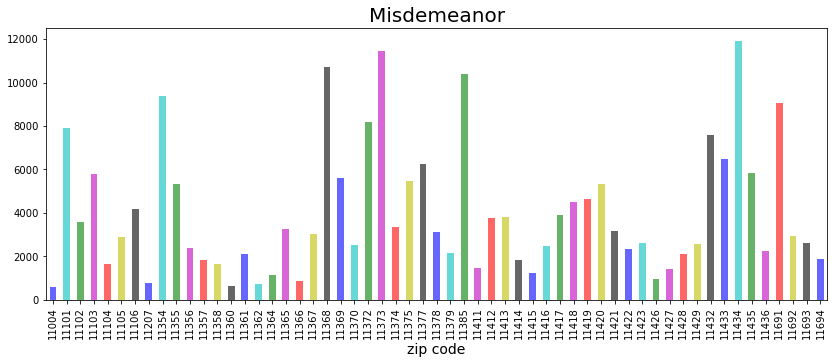

In [22]:
# MISDEMEANOR by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='MISDEMEANOR']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Misdemeanor",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

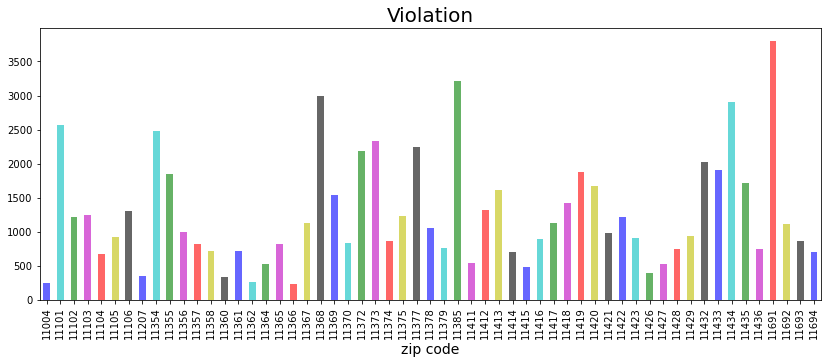

In [23]:
# Violation by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='VIOLATION']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Violation",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

## Make dataframe of "zip"-"law-cat-cd" with averaged lattitude and longitude

- Crosstab Zip & law_cat_cd

In [24]:
ctab_zip_law = pd.crosstab(df['Zip'],df['law_cat_cd'])

# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in queens_zip:    # queenszip: zip list of Bronx
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

df_zip_law = pd.DataFrame(dict(ctab_zip_law))
# Add total crime count for each zip code
df_zip_law['Crime'] = df_zip_law['FELONY']+df_zip_law['MISDEMEANOR']+df_zip_law['VIOLATION']

# Add lattitude and longitude of each zip location to dataframe
df_zip_law['zip'] = df_zip_law.index
df_zip_law = df_zip_law.reset_index(drop=True)
df_zip_law['latitude'] = loc_add['latitude']
df_zip_law['longitude'] = loc_add['longitude']
df_zip_law.head(10)

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude
0,473,588,252,1313,11004,40.744585,-73.712026
1,4698,7885,2572,15155,11101,40.749188,-73.940684
2,2099,3569,1210,6878,11102,40.771185,-73.926525
3,2909,5790,1252,9951,11103,40.762818,-73.914699
4,967,1632,679,3278,11104,40.744165,-73.920746
5,1670,2914,920,5504,11105,40.776300,-73.909928
6,2323,4187,1306,7816,11106,40.761169,-73.930976
7,570,792,354,1716,11207,40.748791,-73.858338
8,4610,9360,2472,16442,11354,40.763144,-73.828108
9,3679,5317,1848,10844,11355,40.752766,-73.824134


In [25]:
df_zip_law.shape

(57, 7)

In [26]:
# Write to a csv file
df_zip_law.to_csv("df_queens_zip_law.csv", index = False)

## Crime count heatmap

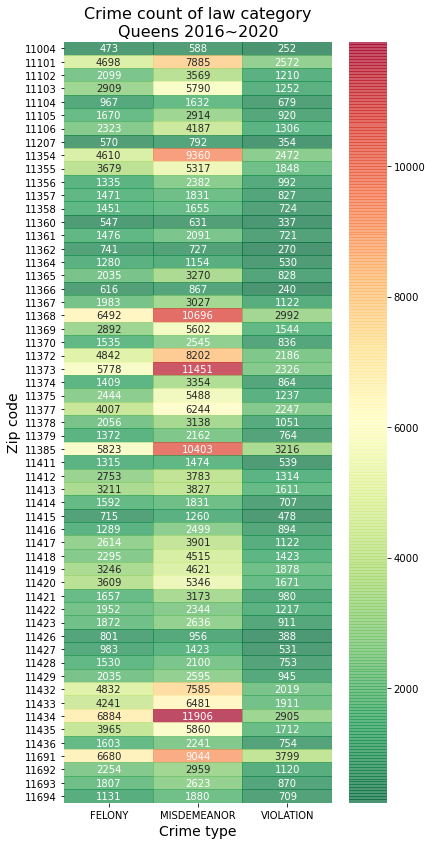

In [27]:
df_select = df_zip_law[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,14))
sns.heatmap(df_select, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count of law category\nQueens 2016~2020', fontsize=16)
plt.show()

## Convert frequency to relative percentage of each law category

In [28]:
df_zip_law_pct = df_zip_law.copy()
df_zip_law_pct = df_zip_law_pct.drop('Crime', axis = 1)
df_zip_law_pct['FELONY'] = df_zip_law['FELONY']/df_zip_law['FELONY'].sum()*100
df_zip_law_pct['MISDEMEANOR'] = df_zip_law['MISDEMEANOR']/df_zip_law['MISDEMEANOR'].sum()*100
df_zip_law_pct['VIOLATION'] = df_zip_law['VIOLATION']/df_zip_law['VIOLATION'].sum()*100
df_zip_law_pct['Crime'] = df_zip_law['Crime']/df_zip_law['Crime'].sum()*100

df_zip_law_pct.head(5)

,FELONY,MISDEMEANOR,VIOLATION,zip,latitude,longitude,Crime
0,0.332049,0.258102,0.350584,11004,40.744585,-73.712026,0.296961
1,3.298022,3.461111,3.578186,11101,40.749188,-73.940684,3.427601
2,1.473510,1.566608,1.683361,11102,40.771185,-73.926525,1.555595
3,2.042134,2.541514,1.741792,11103,40.762818,-73.914699,2.250614
4,0.678839,0.716364,0.944630,11104,40.744165,-73.920746,0.741384


In [29]:
# Write to a csv file
df_zip_law_pct.to_csv("df_queens_zip_law_pct.csv", index = False)

## Crime ratio heatmap

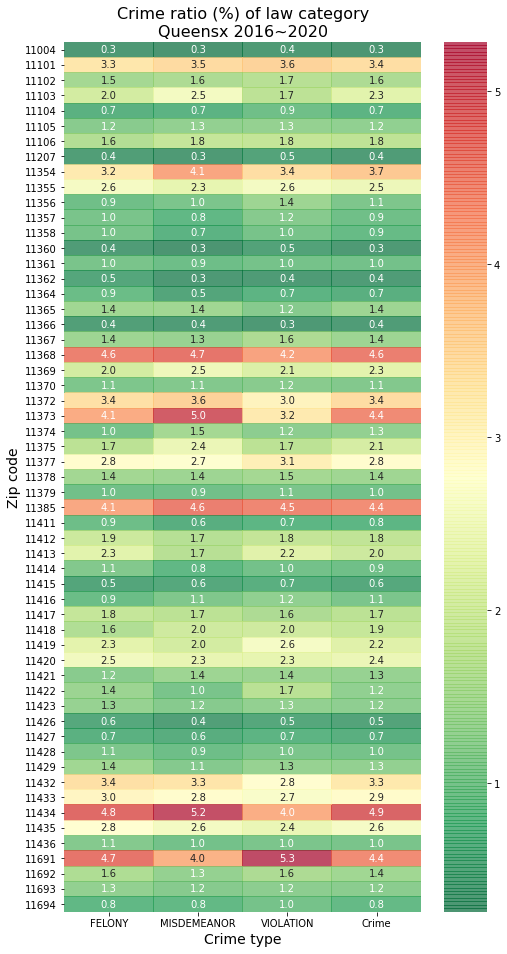

In [30]:
df_select = df_zip_law_pct[['FELONY','MISDEMEANOR','VIOLATION','Crime','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(8,16))
sns.heatmap(df_select, annot=True, fmt='.1f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) of law category\nQueensx 2016~2020', fontsize=16)
plt.show()

## Crime heatmap on the map

In [31]:
# plot_heatmap(category, data_file)
# prameter
#  category (string): crime category to plot 
#  data_file (dataframe): data to plot 
#     percentage distribution otherwise change colorbar label
def plot_heatmap(category, data_file):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(data_file["longitude"],data_file["latitude"], 
                alpha = 0.8, s=100*data_file[category], marker='o',
                c= data_file[category], cmap='RdYlGn_r')
    title_string = category + ' (Queens)'
    plt.title(title_string, fontsize = 20)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)
    cbar = plt.colorbar()
    ny_img = mpimg.imread("NY_Queens_map.png")
    plt.imshow(ny_img, extent=[-73.966, -73.69, 40.538, 40.81], alpha=0.4)
    cbar.set_label("Percentage distribution in Zip code area", fontsize=12)
    plt.show()    

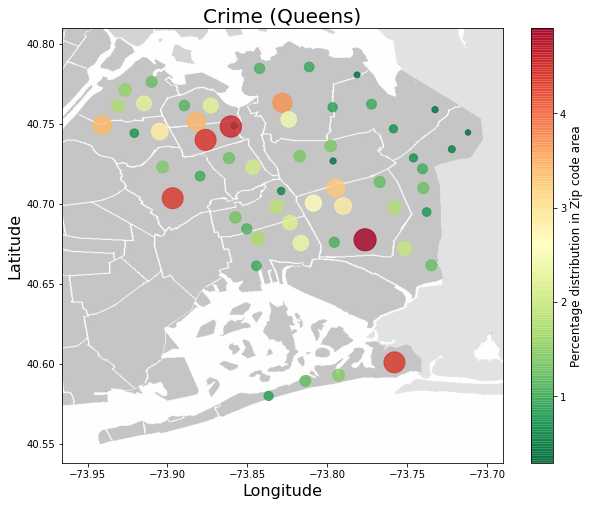

In [32]:
caterory = "Crime"
plot_heatmap(caterory, df_zip_law_pct)

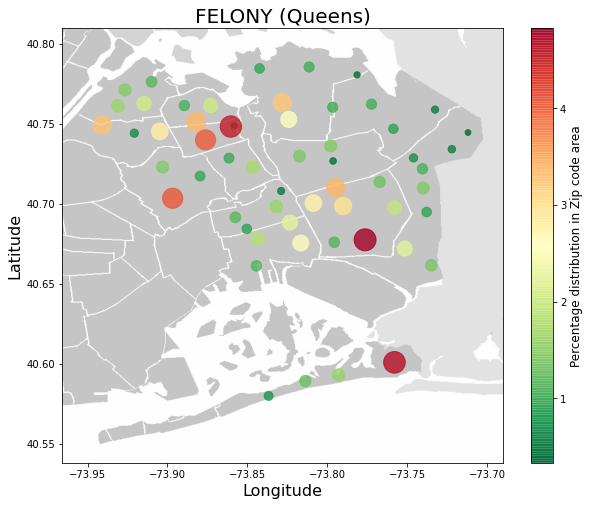

In [33]:
caterory = "FELONY"
plot_heatmap(caterory, df_zip_law_pct)

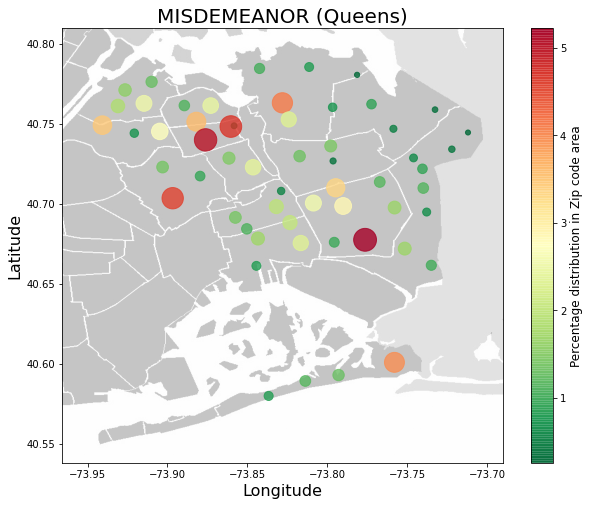

In [34]:
caterory = "MISDEMEANOR"
plot_heatmap(caterory, df_zip_law_pct)

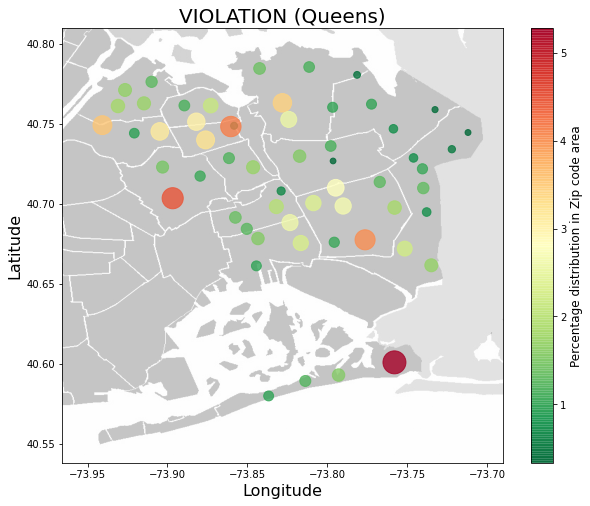

In [35]:
caterory = "VIOLATION"
plot_heatmap(caterory, df_zip_law_pct)

## Crosstab of Offense description and Zip code

In [36]:
# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in queens_zip:    # queens_zip: zip list of Brooklyn
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

In [37]:
ctab_zip_ofns_desc = pd.crosstab(df['Zip'],df['ofns_desc'])

# Add lattitude and longitude of each zip location to dataframe
df_zip_ofns = pd.DataFrame(dict(ctab_zip_ofns_desc))
df_zip_ofns['zip'] = df_zip_ofns.index
df_zip_ofns = df_zip_ofns.reset_index(drop=True)
df_zip_ofns['latitude'] = loc_add['latitude']
df_zip_ofns['longitude'] = loc_add['longitude']
df_zip_ofns.head(5)

,ADMINISTRATIVE CODE,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,FRAUDS,...,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,1,104,83,188,8,2,1,37,4,8,...,0,0,27,0,23,8,17,11004,40.744585,-73.712026
1,14,1641,381,1825,99,312,183,619,145,78,...,42,64,319,365,129,108,348,11101,40.749188,-73.940684
2,14,832,206,972,68,117,124,326,46,27,...,20,0,153,0,55,19,115,11102,40.771185,-73.926525
3,6,1037,220,1039,60,129,66,320,46,35,...,30,132,219,601,72,40,179,11103,40.762818,-73.914699
4,4,351,119,439,18,20,13,98,24,25,...,11,0,59,0,50,13,29,11104,40.744165,-73.920746


In [38]:
df_zip_ofns.shape

(57, 29)

In [39]:
# Write to a csv file
df_zip_ofns.to_csv("df_queens_zip_ofns.csv", index = False)

## Convert frequency to relative percentage of each offense description

In [40]:
col_names = list(df_zip_ofns.keys())
print(col_names)

['ADMINISTRATIVE CODE', 'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'FORGERY', 'FRAUDS', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'RAPE', 'ROBBERY', 'SEX CRIMES', 'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS', 'zip', 'latitude', 'longitude']


In [41]:
df_zip_ofns_pct = df_zip_ofns.copy()
for index in col_names[:-3]:
    column = df_zip_ofns_pct[index]
    df_zip_ofns_pct[index] = column/column.sum()*100
df_zip_ofns_pct.head()

,ADMINISTRATIVE CODE,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,FRAUDS,...,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,0.086133,0.203276,0.590495,0.366958,0.226501,0.032087,0.015074,0.187865,0.104657,0.364465,...,0.000000,0.000000,0.206833,0.000000,0.617781,0.271924,0.193887,11004,40.744585,-73.712026
1,1.205857,3.207459,2.710586,3.562227,2.802945,5.005615,2.758517,3.142930,3.793825,3.553531,...,2.788845,4.298187,2.443695,5.734485,3.464948,3.670972,3.968978,11101,40.749188,-73.940684
2,1.205857,1.626207,1.465566,1.897252,1.925255,1.877106,1.869159,1.655242,1.203558,1.230068,...,1.328021,0.000000,1.172055,0.000000,1.477303,0.645819,1.311588,11102,40.771185,-73.926525
3,0.516796,2.026895,1.565168,2.028029,1.698754,2.069629,0.994875,1.624778,1.203558,1.594533,...,1.992032,8.865010,1.677647,9.442262,1.933924,1.359619,2.041515,11103,40.762818,-73.914699
4,0.344531,0.686056,0.846614,0.856886,0.509626,0.320873,0.195960,0.497588,0.627943,1.138952,...,0.730412,0.000000,0.451969,0.000000,1.343003,0.441876,0.330748,11104,40.744165,-73.920746


In [42]:
df_zip_ofns_pct.shape

(57, 29)

In [43]:
# Write to a csv file
df_zip_ofns_pct.to_csv("df_queens_zip_ofns_pct.csv", index = False)

In [44]:
col_names[-3]

'zip'

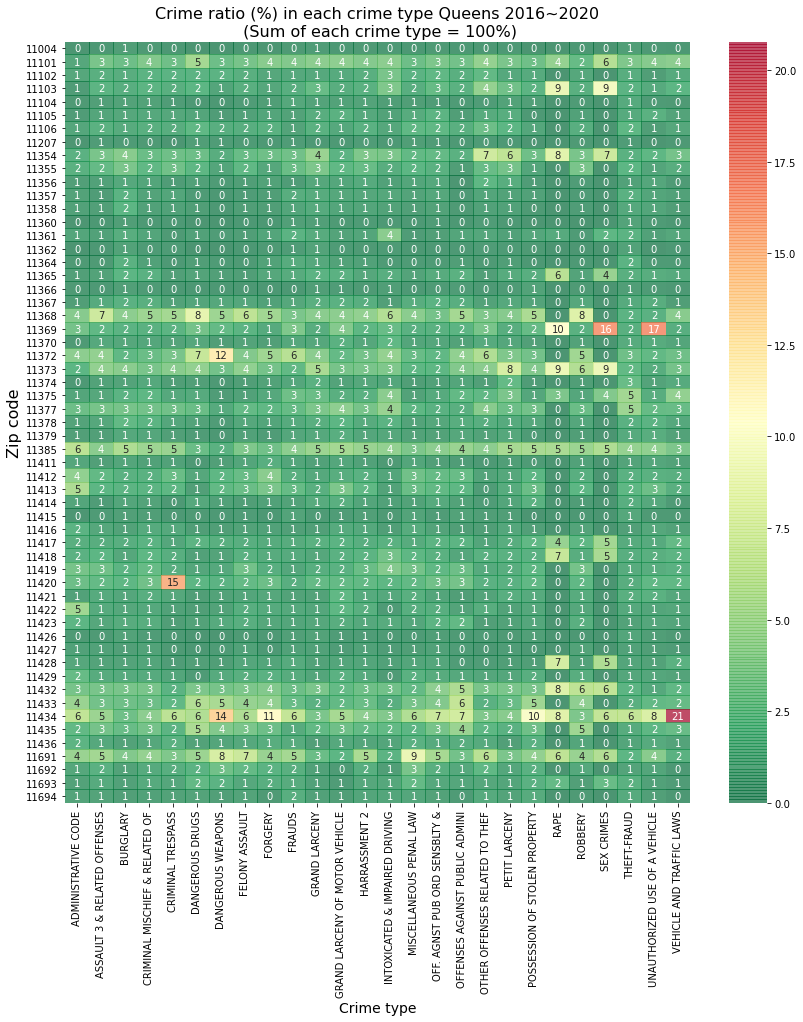

In [45]:
df2_plot = df_zip_ofns_pct[[x for x in col_names[0:-2]]]
df2_plot = df2_plot.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(14,14))
sns.heatmap(df2_plot, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=16)
plt.title('Crime ratio (%) in each crime type Queens 2016~2020\n (Sum of each crime type = 100%)', fontsize=16)
plt.show()

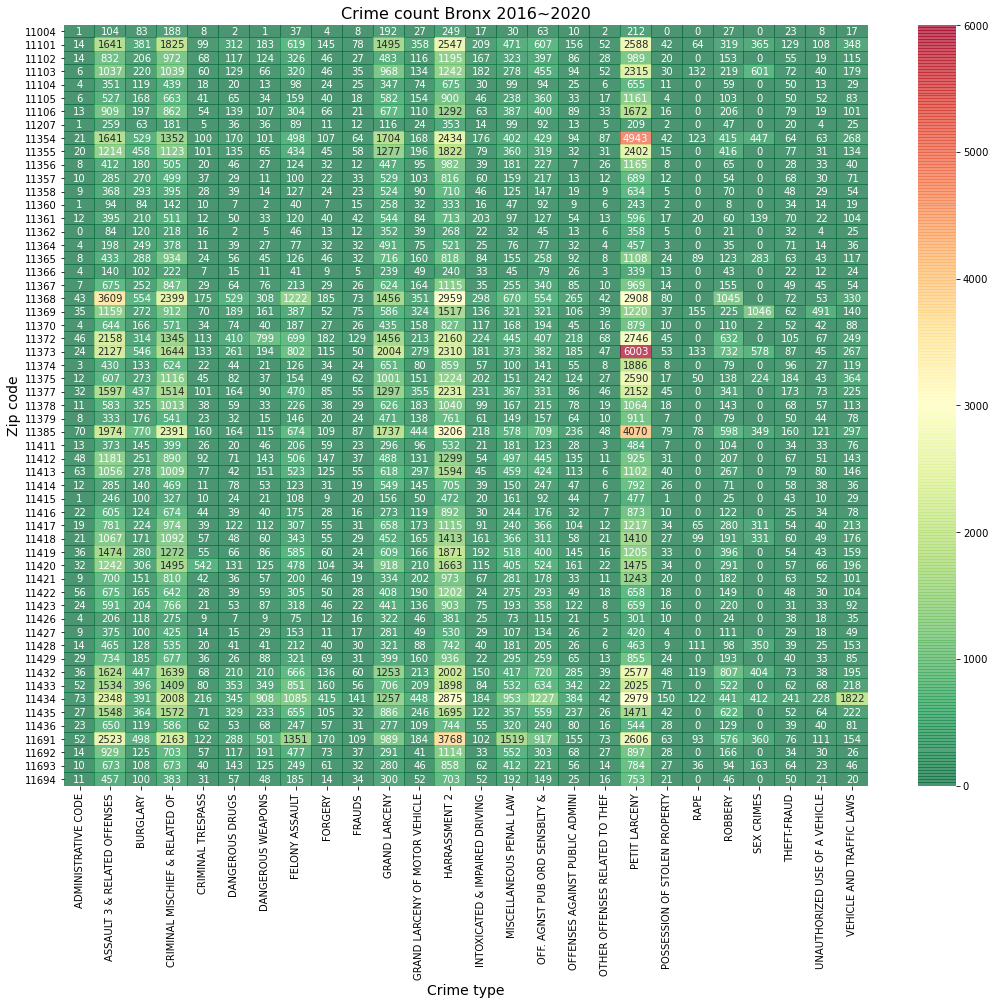

In [46]:
df2_plot2 = df_zip_ofns[[x for x in col_names[0:-2]]]
df2_plot2 = df2_plot2.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(18,14))
sns.heatmap(df2_plot2, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count Bronx 2016~2020', fontsize=16)
plt.show()

## Plot by crime type

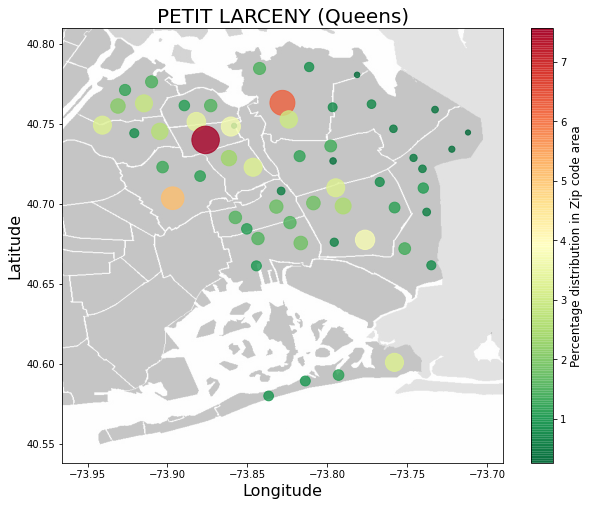

In [47]:
caterory = "PETIT LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

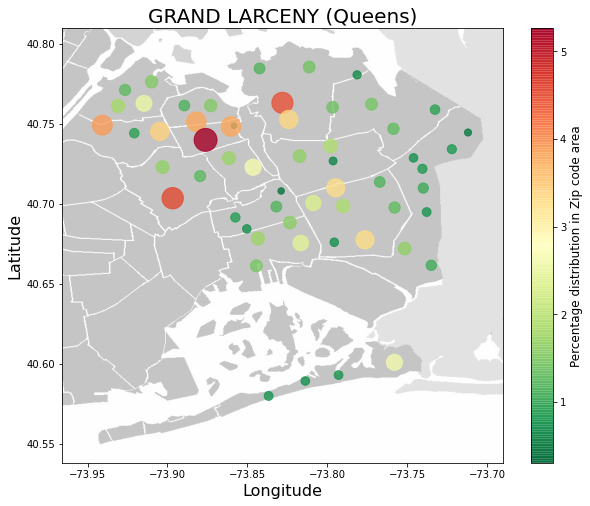

In [48]:
caterory = "GRAND LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

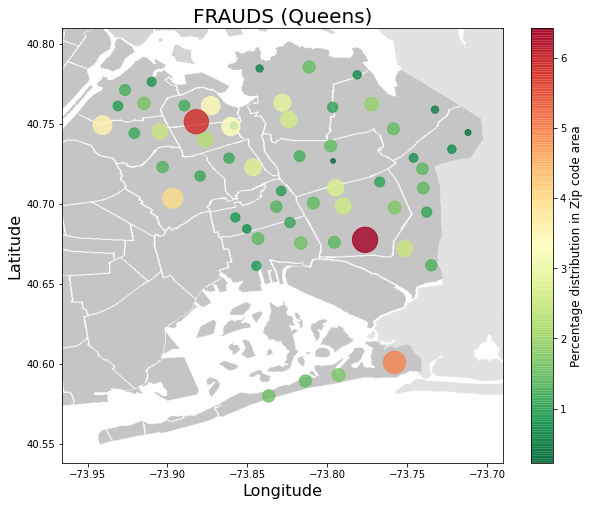

In [49]:
caterory = "FRAUDS"
plot_heatmap(caterory, df_zip_ofns_pct)

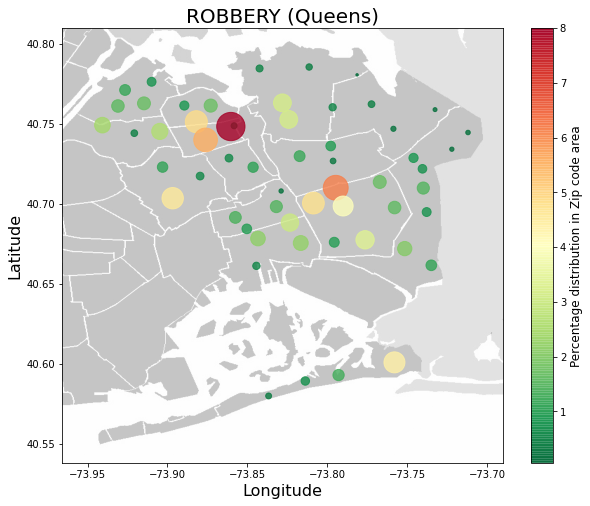

In [50]:
caterory = "ROBBERY"
plot_heatmap(caterory, df_zip_ofns_pct)

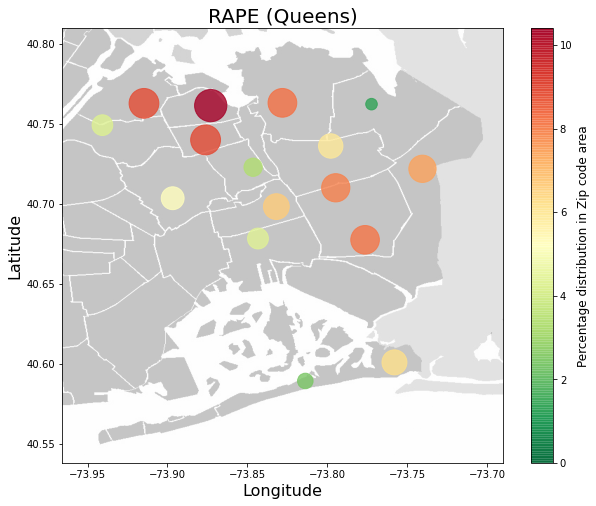

In [51]:
caterory = "RAPE"
plot_heatmap(caterory, df_zip_ofns_pct)

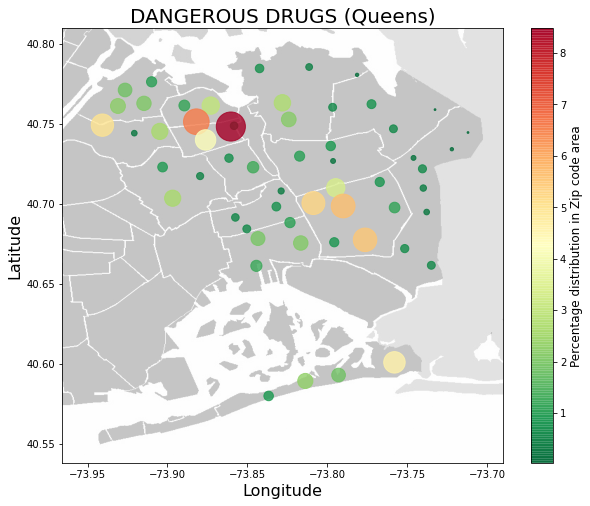

In [52]:
caterory = "DANGEROUS DRUGS"
plot_heatmap(caterory, df_zip_ofns_pct)